In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print (tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.13.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%%bash
MYPROJECT="/content/drive/MyDrivr/Colab Notebooks"
ls -l "$MYPROJECT"
echo "$MYPROJECT"> confing.txt

ls: cannot access '/content/drive/MyDrivr/Colab Notebooks': No such file or directory


In [10]:
import keras
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()
img_width=32
img_height = 32
NUM_CLASSES = 32
cifar10_classes = ["Aeroplano", "Automovil", "Ave", "Gato", "Ciervo","Perro","Sapo", "Caballo", "Barco", "Camion"]

Train: (50000, 32, 32, 3) (50000, 1)
Test:  (10000, 32, 32, 3) (10000, 1)


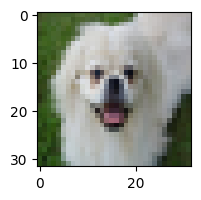

IMAGEN:  8500
CLASE ID:  [5]
CLASE:  Perro


In [11]:
print("Train:", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)
import matplotlib.pyplot as plt
img_idx= 8500
fig_size_original = plt.rcParams["figure.figsize"]
fig_size = fig_size_original.copy()
fig_size[0] = 3
fig_size[1] = 2
plt.rcParams["figure.figsize"]=fig_size
plt.imshow(x_train[img_idx], interpolation='nearest')
plt.show()
classId = y_train[img_idx]
print('IMAGEN: ', img_idx)
print ("CLASE ID: ", classId)
print("CLASE: ", cifar10_classes[classId[0]])

In [20]:
from keras.utils import to_categorical
x_train2 = (x_train /255.0)
x_test2 = (x_test/255.0)

y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)
print(y_train2[img_idx])
print(cifar10_classes)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
['Aeroplano', 'Automovil', 'Ave', 'Gato', 'Ciervo', 'Perro', 'Sapo', 'Caballo', 'Barco', 'Camion']


In [21]:
num_imgs_training = len(x_train2)
num_imgs_testing = len(y_test2)
print("numero de imagenes de entrenamiento: ", num_imgs_training)
print("numero de imagenes de testeo: ", num_imgs_testing)

numero de imagenes de entrenamiento:  50000
numero de imagenes de testeo:  10000


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

neural_network = Sequential()
neural_network.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu',  input_shape=(img_width, img_height, 3)))
neural_network.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding= 'valid'))